In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [298]:
data = pd.read_excel('heart-dataset.xlsx')
df = data.copy()

In [299]:
df.columns = ['age','sexe','type_douleur_thoracique','pression_artérielle','cholesterol','glycémie_a_jeun','résultats_electrocardiogramme','fréquence_cardiaque_maximale','angine','depression','pente_du_segment_ST_exercice','presence_maladie_cardiaque']

In [300]:
df['sexe'] = df['sexe'].replace({"homme":1,"femme":0})
df['type_douleur_thoracique'] = df['type_douleur_thoracique'].replace({'ASY':0,'DNA':1,'AA':2,'AT':3})
df['résultats_electrocardiogramme'] = df['résultats_electrocardiogramme'].replace({'Normal':0,'LVH':1,'ST':2})
df['angine'] = df['angine'].replace({'Oui':0,'Non':1})
df['pente_du_segment_ST_exercice'] = df['pente_du_segment_ST_exercice'].replace({'Plat':0,'Ascendant':1,'Descendant':2})
df.head()

,age,sexe,type_douleur_thoracique,pression_artérielle,cholesterol,glycémie_a_jeun,résultats_electrocardiogramme,fréquence_cardiaque_maximale,angine,depression,pente_du_segment_ST_exercice,presence_maladie_cardiaque
0,40,1,2,140,289,0,0,172,1,0.0,1,0
1,49,0,1,160,180,0,0,156,1,1.0,0,1
2,37,1,2,130,283,0,2,98,1,0.0,1,0
3,48,0,0,138,214,0,0,108,0,1.5,0,1
4,54,1,1,150,195,0,0,122,1,0.0,1,0


#### **1er modèle**

In [301]:
X = df.drop(columns= "presence_maladie_cardiaque" , axis = 1)
Y = df["presence_maladie_cardiaque"]

In [302]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [303]:
print(X_train.shape, X_test.shape, Y_test.shape, Y_train.shape)

(734, 11) (184, 11) (184,) (734,)


In [304]:
model = LogisticRegression(random_state=42)
model.fit(X_train,Y_train)

LogisticRegression(random_state=42)

In [305]:
Y_pred = model.predict(X_test)

In [306]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [307]:
confusion_matrix_1 = pd.DataFrame(confusion_matrix(Y_test,Y_pred), columns=['Absence','Présence'], index=['Absence','Présence'])
confusion_matrix_1

,Absence,Présence
Absence,68,9
Présence,19,88


In [308]:
confusion_matrix_1 = np.array(confusion_matrix_1)
total=sum(sum(confusion_matrix_1))

sensibilite = confusion_matrix_1[0,0]/(confusion_matrix_1[0,0]+confusion_matrix_1[1,0])
print('sensibilite : ', sensibilite)

specificite = confusion_matrix_1[1,1]/(confusion_matrix_1[1,1]+confusion_matrix_1[0,1])
print('specificite : ', specificite)

sensibilite :  0.7816091954022989
specificite :  0.9072164948453608


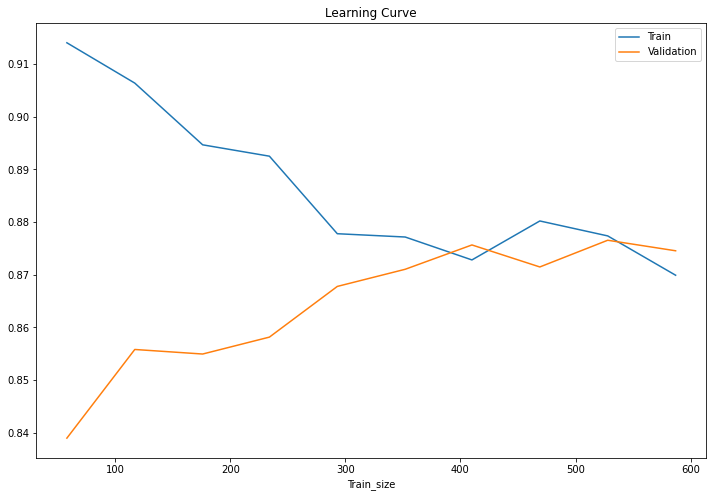

In [309]:
var, train_score, val_score = learning_curve(model,X_train, Y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, scoring='f1')
plt.figure(figsize=(12,8))
plt.title('Learning Curve')
plt.plot(var, train_score.mean(axis = 1), label = 'Train')
plt.plot(var, val_score.mean(axis = 1), label = 'Validation')
plt.xlabel('Train_size')
plt.legend()
plt.show()

### **2ème modèle**

In [310]:
df = data.copy()
df.columns = ['age','sexe','type_douleur_thoracique','pression_artérielle','cholesterol','glycémie_a_jeun','résultats_electrocardiogramme','fréquence_cardiaque_maximale','angine','depression','pente_du_segment_ST_exercice','presence_maladie_cardiaque']

In [311]:
df['sexe'] = df['sexe'].replace({"homme":1,"femme":0})
df['type_douleur_thoracique'] = df['type_douleur_thoracique'].replace({'ASY':0,'DNA':1,'AA':2,'AT':3})
df['résultats_electrocardiogramme'] = df['résultats_electrocardiogramme'].replace({'Normal':0,'LVH':1,'ST':2})
df['angine'] = df['angine'].replace({'Oui':0,'Non':1})
df['pente_du_segment_ST_exercice'] = df['pente_du_segment_ST_exercice'].replace({'Plat':0,'Ascendant':1,'Descendant':2})

cols_quanti = ['age','pression_artérielle','cholesterol','résultats_electrocardiogramme','fréquence_cardiaque_maximale','depression']
normalizer = RobustScaler()
df[cols_quanti] = normalizer.fit_transform(df[cols_quanti].values)
df.head()

,age,sexe,type_douleur_thoracique,pression_artérielle,cholesterol,glycémie_a_jeun,résultats_electrocardiogramme,fréquence_cardiaque_maximale,angine,depression,pente_du_segment_ST_exercice,presence_maladie_cardiaque
0,-1.076923,1,2,0.5,0.704000,0,0.0,0.944444,1,-0.400000,1,0
1,-0.384615,0,1,1.5,-0.458667,0,0.0,0.500000,1,0.266667,0,1
2,-1.307692,1,2,0.0,0.640000,0,2.0,-1.111111,1,-0.400000,1,0
3,-0.461538,0,0,0.4,-0.096000,0,0.0,-0.833333,0,0.600000,0,1
4,0.000000,1,1,1.0,-0.298667,0,0.0,-0.444444,1,-0.400000,1,0


In [312]:
X = df_1.drop(columns= "presence_maladie_cardiaque" , axis = 1)
Y = df_1["presence_maladie_cardiaque"]

In [313]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [314]:
model = LogisticRegression(random_state=42)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [315]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        77
           1       0.92      0.82      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [316]:
confusion_matrix_2 = pd.DataFrame(confusion_matrix(Y_test,Y_pred), columns=['Absence','Présence'], index=['Absence','Présence'])
confusion_matrix_2

,Absence,Présence
Absence,69,8
Présence,19,88


In [317]:
confusion_matrix_2 = np.array(confusion_matrix_2)
total=sum(sum(confusion_matrix_2))

sensibilite = confusion_matrix_2[0,0]/(confusion_matrix_2[0,0]+confusion_matrix_2[1,0])
print('sensibilite : ', sensibilite )

specificite = confusion_matrix_2[1,1]/(confusion_matrix_2[1,1]+confusion_matrix_2[0,1])
print('specificite : ', specificite)

sensibilite :  0.7840909090909091
specificite :  0.9166666666666666


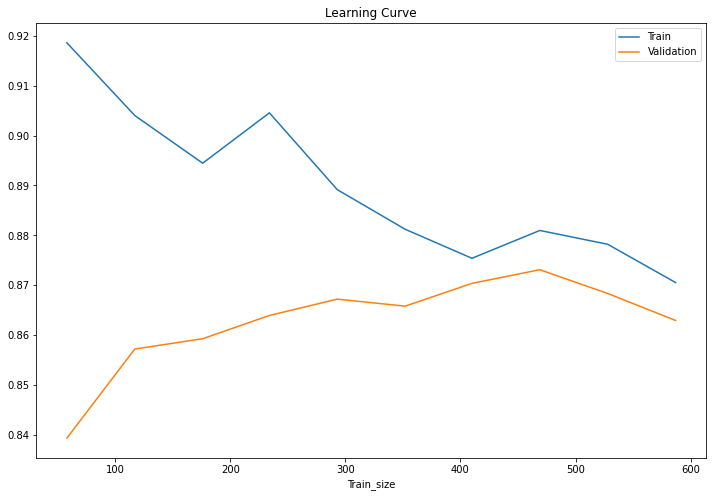

In [318]:
var, train_score, val_score = learning_curve(model,X_train, Y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, scoring='f1')
plt.figure(figsize=(12,8))
plt.title('Learning Curve')
plt.plot(var, train_score.mean(axis = 1), label = 'Train')
plt.plot(var, val_score.mean(axis = 1), label = 'Validation')
plt.xlabel('Train_size')
plt.legend()
plt.show()

### **3ème modèle**

In [319]:
df = data.copy()
df.columns = ['age','sexe','type_douleur_thoracique','pression_artérielle','cholesterol','glycémie_a_jeun','résultats_electrocardiogramme','fréquence_cardiaque_maximale','angine','depression','pente_du_segment_ST_exercice','presence_maladie_cardiaque']

In [320]:
df['sexe'] = df['sexe'].replace({"homme":1,"femme":0})
df['type_douleur_thoracique'] = df['type_douleur_thoracique'].replace({'ASY':0,'DNA':1,'AA':2,'AT':3})
df['résultats_electrocardiogramme'] = df['résultats_electrocardiogramme'].replace({'Normal':0,'LVH':1,'ST':2})
df['angine'] = df['angine'].replace({'Oui':0,'Non':1})
df['pente_du_segment_ST_exercice'] = df['pente_du_segment_ST_exercice'].replace({'Plat':0,'Ascendant':1,'Descendant':2})

cols_quanti = ['age','pression_artérielle','cholesterol','résultats_electrocardiogramme','fréquence_cardiaque_maximale','depression']
normalizer = StandardScaler()
df[cols_quanti] = normalizer.fit_transform(df[cols_quanti].values)
df.head()

,age,sexe,type_douleur_thoracique,pression_artérielle,cholesterol,glycémie_a_jeun,résultats_electrocardiogramme,fréquence_cardiaque_maximale,angine,depression,pente_du_segment_ST_exercice,presence_maladie_cardiaque
0,-1.433140,1,2,0.410909,0.825070,0,-0.747055,1.382928,1,-0.832432,1,0
1,-0.478484,0,1,1.491752,-0.171961,0,-0.747055,0.754157,1,0.105664,0,1
2,-1.751359,1,2,-0.129513,0.770188,0,1.774257,-1.525138,1,-0.832432,1,0
3,-0.584556,0,0,0.302825,0.139040,0,-0.747055,-1.132156,0,0.574711,0,1
4,0.051881,1,1,0.951331,-0.034755,0,-0.747055,-0.581981,1,-0.832432,1,0


In [321]:
X = df.drop(columns= "presence_maladie_cardiaque" , axis = 1)
Y = df["presence_maladie_cardiaque"]

In [322]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [323]:
model = LogisticRegression(random_state=42)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [324]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        77
           1       0.92      0.82      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [325]:
confusion_matrix_3 = pd.DataFrame(confusion_matrix(Y_test,Y_pred), columns=['Absence','Présence'], index=['Absence','Présence'])
confusion_matrix_3

,Absence,Présence
Absence,69,8
Présence,19,88


In [326]:
confusion_matrix_3 = np.array(confusion_matrix_3)
total=sum(sum(confusion_matrix_3))

sensibilite = confusion_matrix_3[0,0]/(confusion_matrix_3[0,0]+confusion_matrix_3[1,0])
print('sensibilite : ', sensibilite )

specificite = confusion_matrix_3[1,1]/(confusion_matrix_3[1,1]+confusion_matrix_3[0,1])
print('specificite : ', specificite)

sensibilite :  0.7840909090909091
specificite :  0.9166666666666666


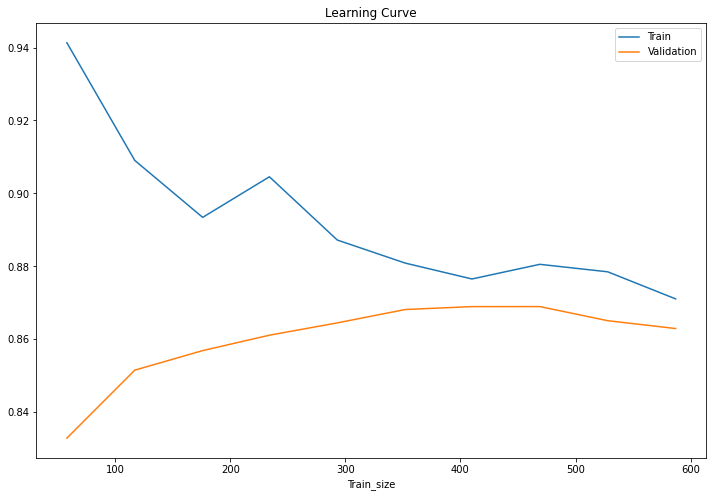

In [327]:
var, train_score, val_score = learning_curve(model,X_train, Y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, scoring='f1')
plt.figure(figsize=(12,8))
plt.title('Learning Curve')
plt.plot(var, train_score.mean(axis = 1), label = 'Train')
plt.plot(var, val_score.mean(axis = 1), label = 'Validation')
plt.xlabel('Train_size')
plt.legend()
plt.show()

### **4ème modèle**

In [328]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [329]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        77
           1       0.90      0.81      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [330]:
confusion_matrix_4 = pd.DataFrame(confusion_matrix(Y_test,Y_pred), columns=['Absence','Présence'], index=['Absence','Présence'])
confusion_matrix_4

,Absence,Présence
Absence,67,10
Présence,20,87


In [331]:
confusion_matrix_4 = np.array(confusion_matrix_4)
total=sum(sum(confusion_matrix_4))

sensibilite = confusion_matrix_4[0,0]/(confusion_matrix_4[0,0]+confusion_matrix_4[1,0])
print('sensibilite : ', sensibilite )

specificite = confusion_matrix_4[1,1]/(confusion_matrix_4[1,1]+confusion_matrix_4[0,1])
print('specificite : ', specificite)

sensibilite :  0.7701149425287356
specificite :  0.8969072164948454


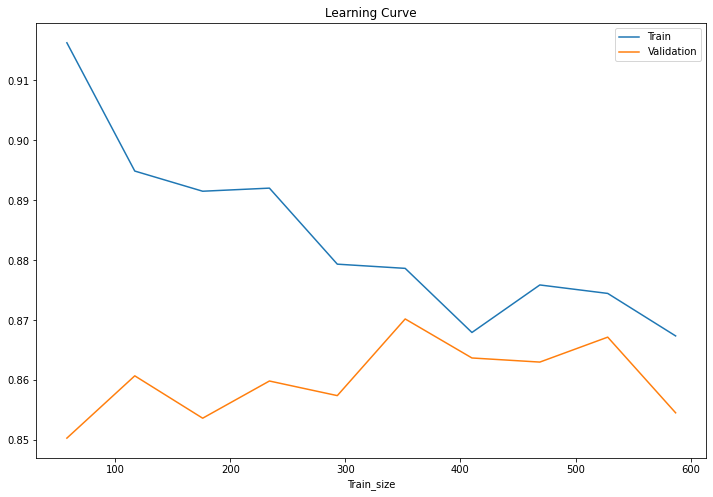

In [332]:
var, train_score, val_score = learning_curve(model,X_train, Y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, scoring='f1')
plt.figure(figsize=(12,8))
plt.title('Learning Curve')
plt.plot(var, train_score.mean(axis = 1), label = 'Train')
plt.plot(var, val_score.mean(axis = 1), label = 'Validation')
plt.xlabel('Train_size')
plt.legend()
plt.show()

### **5ème modèle**

In [333]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [334]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [335]:
confusion_matrix_5 = pd.DataFrame(confusion_matrix(Y_test,Y_pred), columns=['Absence','Présence'], index=['Absence','Présence'])
confusion_matrix_5

,Absence,Présence
Absence,66,11
Présence,12,95


In [336]:
confusion_matrix_5 = np.array(confusion_matrix_5)
total=sum(sum(confusion_matrix_5))

sensibilite = confusion_matrix_5[0,0]/(confusion_matrix_5[0,0]+confusion_matrix_5[1,0])
print('sensibilite : ', sensibilite )

specificite = confusion_matrix_5[1,1]/(confusion_matrix_5[1,1]+confusion_matrix_5[0,1])
print('specificite : ', specificite)

sensibilite :  0.8461538461538461
specificite :  0.8962264150943396


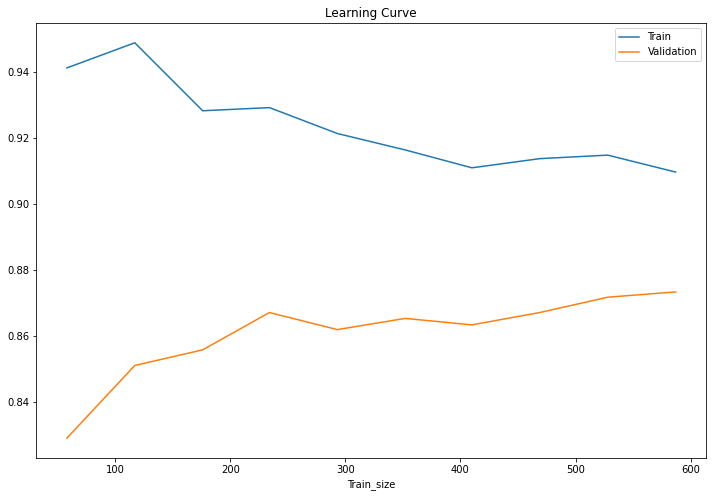

In [337]:
var, train_score, val_score = learning_curve(model,X_train, Y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, scoring='f1')
plt.figure(figsize=(12,8))
plt.title('Learning Curve')
plt.plot(var, train_score.mean(axis = 1), label = 'Train')
plt.plot(var, val_score.mean(axis = 1), label = 'Validation')
plt.xlabel('Train_size')
plt.legend()
plt.show()

### **6ème Modèle**

In [338]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [339]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        77
           1       0.91      0.91      0.91       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [340]:
confusion_matrix_6 = pd.DataFrame(confusion_matrix(Y_test,Y_pred), columns=['Absence','Présence'], index=['Absence','Présence'])
confusion_matrix_6

,Absence,Présence
Absence,67,10
Présence,10,97


In [341]:
confusion_matrix_6 = np.array(confusion_matrix_6)
total=sum(sum(confusion_matrix_6))

sensibilite = confusion_matrix_6[0,0]/(confusion_matrix_6[0,0]+confusion_matrix_6[1,0])
print('sensibilite : ', sensibilite )

specificite = confusion_matrix_6[1,1]/(confusion_matrix_6[1,1]+confusion_matrix_6[0,1])
print('specificite : ', specificite)

sensibilite :  0.8701298701298701
specificite :  0.9065420560747663


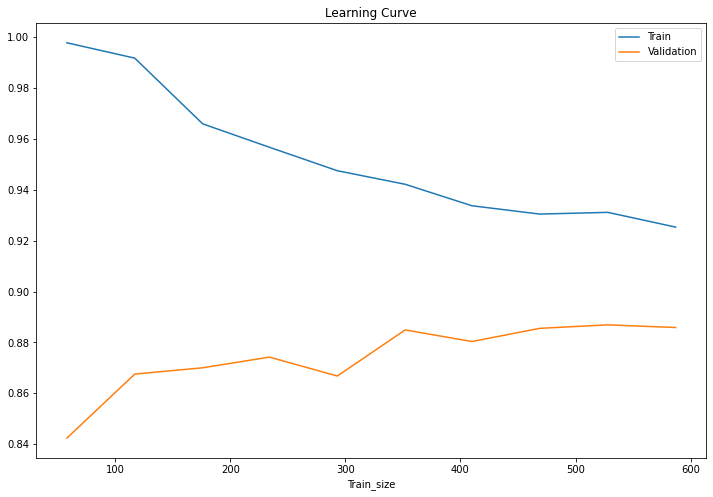

In [342]:
var, train_score, val_score = learning_curve(model,X_train, Y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, scoring='f1')
plt.figure(figsize=(12,8))
plt.title('Learning Curve')
plt.plot(var, train_score.mean(axis = 1), label = 'Train')
plt.plot(var, val_score.mean(axis = 1), label = 'Validation')
plt.xlabel('Train_size')
plt.legend()
plt.show()

## Résultats du Prepossessing & Modelisation

**1ère Modelisation**

> Matrice de confusion
- Sur un total de 77 personnes qui n'ont pas de maladie cardiaque, on a pu identifier correctement 68 personnes et on a fait 9 erreurs donc 9 personnes qui ont effectivement la maladie cardiaque mais ont été dectecté comme ne pas avoir la maladie (attention).

- De même sur un total de 107 personnes qui souffre de maladie cardiaque, on a pu identifier correctement 88 personnes et on a fait 19 erreurs donc 19 personnes qui ont n'ont pas la maladie cardiaque mais ont été dectecté comme avoir la maladie.

> Courbe d'apprentissage